In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os, sys
import esutil, scipy
sys.path.append('../')
from utils import *
from cmass_modules import io, Cuts
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
def clean_gold(gold_st82):
    from run_DMASS import priorCut_test
    gold_st82 = gold_st82[gold_st82['MODEST_CLASS'] == 1]
    gold_st82 = Cuts.keepGoodRegion(gold_st82)
    mask_y1a1 = (gold_st82['FLAGS_GOLD'] == 0 )&(priorCut_test(gold_st82))
    gold_st82 = gold_st82[mask_y1a1]
    return gold_st82

# Train Sample Z distribution

In [6]:
gold_st82 = io.SearchAndCallFits(path = '/n/des/lee.5922/data/gold_cat/', keyword='STRIPE')
gold_st82 = clean_gold(gold_st82)


--------------------------------
 calling catalog
--------------------------------
Y1A1_GOLD_STRIPE82_v2_000001.fits
Y1A1_GOLD_STRIPE82_v2_000002.fits
Y1A1_GOLD_STRIPE82_v2_000003.fits
Y1A1_GOLD_STRIPE82_v2_000004.fits
Y1A1_GOLD_STRIPE82_v2_000005.fits
Y1A1_GOLD_STRIPE82_v2_000006.fits
Y1A1_GOLD_STRIPE82_v2_000007.fits
Y1A1_GOLD_STRIPE82_v2_000008.fits
reading 1/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000001.fits
reading 2/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000002.fits
reading 3/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000003.fits
reading 4/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000004.fits
reading 5/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000005.fits
reading 6/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000006.fits
reading 7/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000007.fits
reading 8/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000008.fits


/n/home00/lee.5922/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


CHECK input catalog has only galaxies


In [7]:
#gold_spt = io.SearchAndCallFits(path = '/n/des/lee.5922/data/gold_cat/', keyword='Y1A1_GOLD_00001')
#gold_spt = clean_gold(gold_spt)

In [8]:
cmass_spec = esutil.io.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_North.fits.gz')
cmass_sgc = esutil.io.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_South.fits.gz')
cmass_stripe = Cuts.keepGoodRegion(cmass_sgc)
gold_train, cmass_train = matchCatalogsbyPosition(gold_st82, cmass_stripe)

fraction of sample at z < 0.43 : 3.711485272901427
fraction of sample at z < 0.43 : 5.238846327174403
fraction of sample at z < 0.43 : 3.6974930829211035


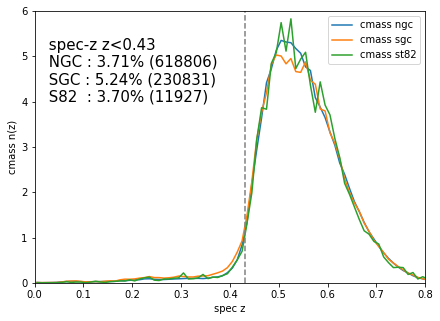

In [87]:
zbin, dz = np.linspace(0.0, 10.0, 1001, retstep=True)
zcenter = zbin[:-1]+dz/2.
fig, ax = plt.subplots(figsize = (7,5))
N_cmass, _ = np.histogram(  cmass_spec['Z'], bins=zbin, normed = True)
N_cmass_sgc,_= np.histogram( cmass_sgc['Z'], bins=zbin, normed=True)
N_cmass_st82,_  = np.histogram( cmass_train['Z'], bins=zbin,  normed=True)

ax.plot(zcenter, N_cmass, label = 'cmass ngc')
ax.plot(zcenter, N_cmass_sgc, label = 'cmass sgc')
ax.plot(zcenter, N_cmass_st82, label ='cmass st82')
ax.axvline(x = 0.43, color='grey', linestyle='--')

ax.set_xlabel('spec z')
ax.set_ylabel('cmass n(z)')
ax.set_xlim(0, 0.8)
ax.set_ylim(0,6)
ax.legend()

fraction1= scipy.integrate.simps(N_cmass[:43], dx = dz )*100
fraction2= scipy.integrate.simps(N_cmass_sgc[:43], dx = dz )*100
fraction3= scipy.integrate.simps(N_cmass_st82[:43], dx = dz )*100

print 'fraction of sample at z < 0.43 :', fraction1
print 'fraction of sample at z < 0.43 :', fraction2
print 'fraction of sample at z < 0.43 :', fraction3

fraction = ' spec-z z<0.43 \n NGC : {:0.2f}% ({}) \n SGC : {:0.2f}% ({}) \n S82  : {:0.2f}% ({})'\
.format(fraction1, cmass_spec.size, fraction2, cmass_sgc.size, fraction3, cmass_train.size)
ax.text(0.02, 4, fraction, fontsize = 15 )

In [4]:
print 618806 * 0.0371, 230831 * 0.0524


22957.7026 12095.5444


In [4]:
#dmass_st82 = esutil.io.read('../output/n2/dmass_st82.fits')
dmass_st82 = esutil.io.read('../output/n2//dmass_st82.fits')
dmass_spt = esutil.io.read('../output/n2_2/dmass_spt.fits')
lowccut = dmass_spt['EachProb_CMASS'] > 0.01
dmass_spt = dmass_spt[lowccut]

In [9]:
dz

0.01

In [23]:
zbin_d, Nz_spt2 = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/zdistris/dmass_spt_1.nz.txt', unpack=True)

fraction of dmass sample at z < 0.43 : 3.93628338940165 11593
fraction of cmass sample at z < 0.43 : 3.990944914898968 11927
fraction of sample at z < 0.43 : 7.065072332247905 112398


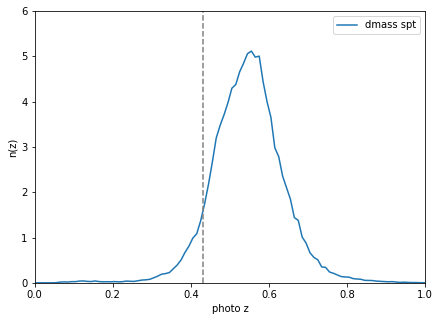

In [27]:
zbin, dz = np.linspace(0.0001, 10.0, 1001, retstep=True)
zcenter = zbin[:-1]+dz/2.
fig, ax = plt.subplots(figsize = (7,5))
N_dmass_st82,_= np.histogram( dmass_st82['DESDM_ZP'], bins=zbin, normed=True)
N_cmass_st82,_  = np.histogram( gold_train['DESDM_ZP'], bins=zbin,  normed=True)
N_dmass_spt,_  = np.histogram( dmass_spt['DESDM_ZP'], bins=zbin,  normed=True)
N_cmass_st82_specz,_  = np.histogram( cmass_train['Z'], bins=zbin,  normed=True)
#N_dmass_spt2,_  = np.histogram( dmass_spt_v2['DESDM_ZP'], bins=zbin,  normed=True)
#N_dmass_st,_  = np.histogram( dmass_st['DESDM_ZP'], bins=zbin,  normed=True)

#ax.plot(zcenter, N_dmass_st82, label = 'dmass st82')
#ax.plot(zcenter, N_cmass_st82, label = 'cmass train')
ax.plot(zcenter, N_dmass_spt, label = 'dmass spt')
#ax.plot(zcenter, N_cmass_st82_specz, '--' ,label = 'cmass train specz')
#ax.plot(zcenter, N_dmass_spt2, label = 'dmass spt, low prob cut')
ax.axvline(x = 0.43, color='grey', linestyle='--')

fraction1= scipy.integrate.simps(N_dmass_st82[:43], dx = dz )*100
fraction2= scipy.integrate.simps(N_cmass_st82[:43], dx = dz )*100
fraction3= scipy.integrate.simps(N_dmass_spt[:43], dx = dz )*100
#fraction4= scipy.integrate.simps(N_dmass_spt2[:43], dx = dz )*100

print 'fraction of dmass sample at z < 0.43 :', fraction1, dmass_st82.size
print 'fraction of cmass sample at z < 0.43 :', fraction2, gold_train.size
print 'fraction of sample at z < 0.43 :', fraction3, dmass_spt.size
#print 'fraction of sample at z < 0.43 :', fraction4, dmass_spt_v2.size

fraction = ' photo-z z < 0.43 \n DMASS : {:0.2f}% ({}) \n CMASS : {:0.2f}% ({})'\
.format(fraction1, dmass_st82.size, fraction2, gold_train.size)
#ax.text(0.02, 4, fraction, fontsize = 15 )
ax.set_xlabel('photo z')
ax.set_ylabel('n(z)')
ax.set_xlim(0, 1.0)
ax.set_ylim(0,6)
ax.legend()

fig.savefig('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg/dmass/dmass_spt.nz.png')

In [21]:
zdist = np.column_stack((zbin[:-1], N_dmass_spt))
np.savetxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg/dmass/dmass_spt.nz',zdist )

In [ ]:
from xd import XD_fitting
clf_cmass = XD_fitting( None, pickleFileName = '../output/n2//gold_st82_XD_cmass.pkl')               
clf_no = XD_fitting( None, pickleFileName = '../output/n2//gold_st82_XD_no.pkl')
cmass_frac = np.loadtxt('../output/n2/cmassfrac')
# assign membership prob ----------------------------------
print '\n--------------------------------\n Assign membership prob\n--------------------------------'
print 'cmass_fraction', cmass_frac
from xd import assignCMASSProb
gold_train_prob = assignCMASSProb( gold_train, clf_cmass, clf_no, cmass_fraction = cmass_frac )
#gold_spt = assignCMASSProb( gold_spt, clf_cmass, clf_no, cmass_fraction = cmass_frac )

In [ ]:
prob_cat = esutil.io.read('../output/n6_modelgr/gold_st82_prob.fits')
prob_cat_spt = io.SearchAndCallFits(path = '/n/des/lee.5922/Dropbox/repositories/CMASS/code/output/n6_modelgr/',\
                                    keyword='gold_spt_prob')
from xd import resampleWithPth
#dmass_spt_v2, _ = resampleWithPth( prob_cat_spt, pstart = 0.01, pmax = 1.0 )
#dmass_st82, _ = resampleWithPth( prob_cat, pstart = 0.01, pmax = 1.0 )

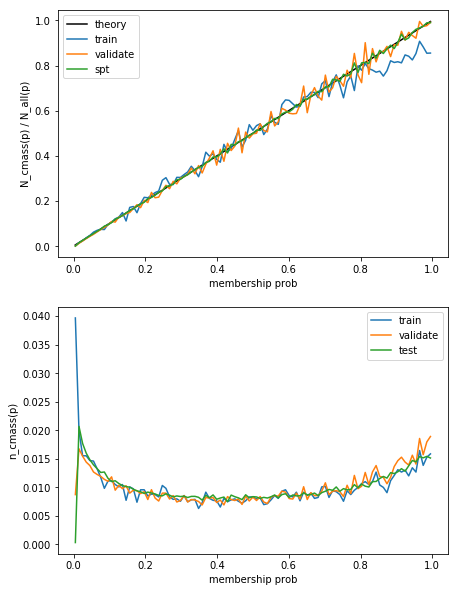

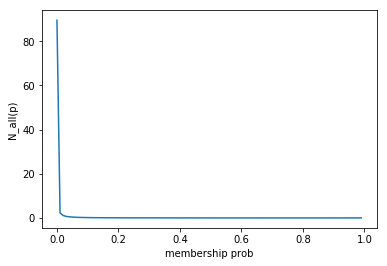

In [103]:
probbin,ps = np.linspace(0.0,1,100,retstep=True)
pcenter = probbin[:-1] + ps/2.
N_train, _ = np.histogram(gold_train_prob['EachProb_CMASS'], bins = probbin)
N, _ = np.histogram(dmass_st82['EachProb_CMASS'], bins = probbin)
N_all, _ = np.histogram(prob_cat['EachProb_CMASS'], bins = probbin)

N1, _ = np.histogram(dmass_spt['EachProb_CMASS'], bins = probbin)
N1_all, _ = np.histogram(prob_cat_spt['EachProb_CMASS'], bins = probbin)


fig, (ax,ax2) = plt.subplots(2,1,figsize = (7,10))

ax.plot(pcenter, pcenter, 'k-', label='theory')
ax.plot(pcenter, N_train*1./N_all, label='train')
ax.plot(pcenter, N*1./N_all, label='validate')
ax.plot(pcenter, N1*1./N1_all, label='spt')
ax.legend(loc='best')
ax.set_xlabel('membership prob')
ax.set_ylabel('N_cmass(p) / N_all(p)')

ax2.plot(pcenter, N_train*1./np.sum(N_train), label='train')
ax2.plot(pcenter, N*1./np.sum(N), label='validate')
ax2.plot(pcenter, N1*1./np.sum(N1), label='test')

ax2.set_xlabel('membership prob')
ax2.set_ylabel('n_cmass(p)')
ax2.legend()

fig, ax = plt.subplots()
p_all, _ = np.histogram(prob_cat['EachProb_CMASS'], bins = probbin, normed=True)
#p_all1, _ = np.histogram(gold_spt['EachProb_CMASS'], bins = probbin, normed=True)
ax.plot(probbin[:-1], p_all, label='all')
#ax.plot(probbin[:-1], p_all1, label='all')
ax.set_xlabel('membership prob')
ax.set_ylabel('N_all(p)')

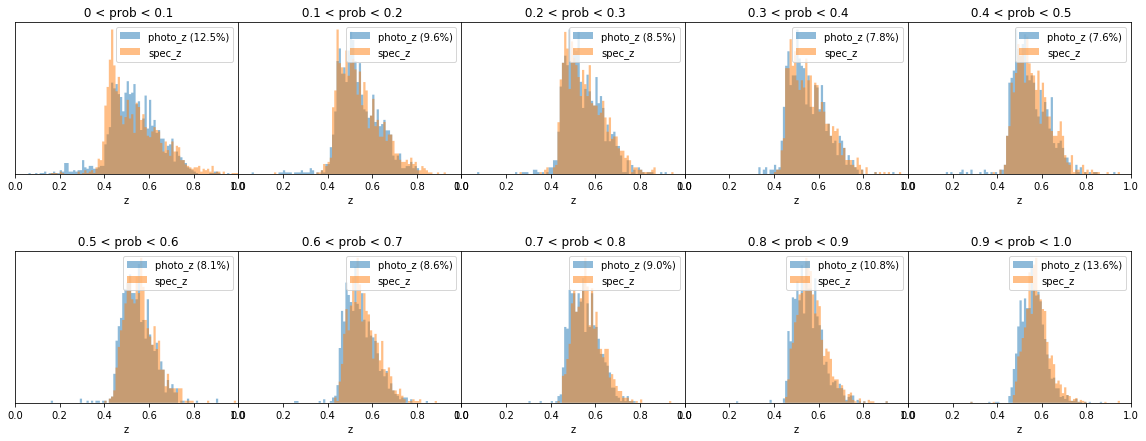

In [104]:

probcut = 0.0
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))

ax = ax.ravel()
for i in range(10):     
    #for la, cat in zip(labels, catlist) :     
    mask = (gold_train_prob['EachProb_CMASS'] > probcut) & (gold_train_prob['EachProb_CMASS'] < probcut + 0.1) \
    & (gold_train_prob['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
    
    ax[i].hist( cmass_train['Z'][mask], \
            bins = zbin, alpha = 0.5, label = 'photo_z ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
               normed=True, histtype='stepfilled' );  
    ax[i].hist( gold_train_prob['DESDM_ZP'][mask], \
            bins = zbin, alpha = 0.5, label = 'spec_z', \
            normed=True, histtype='stepfilled' );  

    tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
    ax[i].set_xlim(0, 1.0)
    ax[i].legend(loc='best')
    ax[i].set_title(tag)
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('n(z)')
    ax[i].get_yaxis().set_visible(False)
    #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


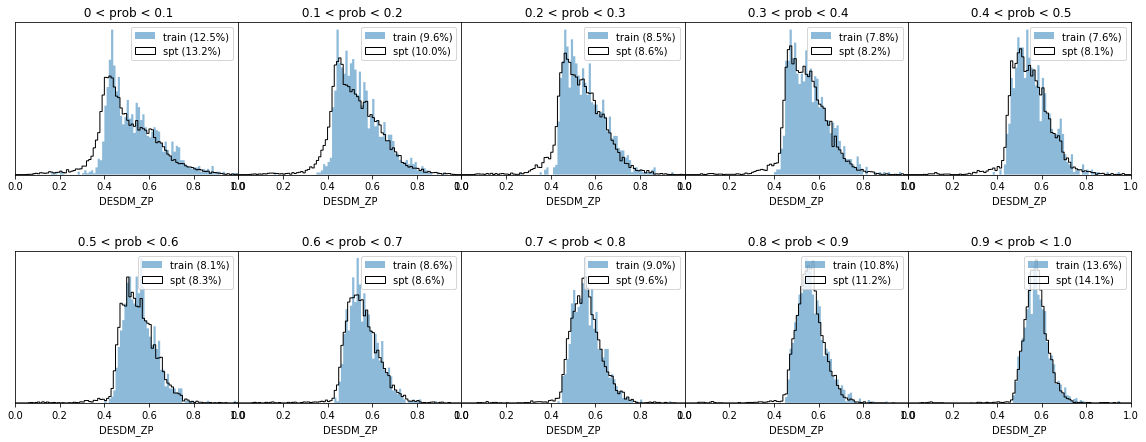

In [128]:

probcut = 0.0

labels = ['train', 'spt']
catlist = [gold_train_prob, dmass_spt]

probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'spt' : 
            ax[i].hist( cat['DESDM_ZP'][mask], \
                    bins = zbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( cat['DESDM_ZP'][mask], \
                    bins = zbin, alpha = alpha, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc='best')
        ax[i].set_title(tag)
        ax[i].set_xlabel('DESDM_ZP')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


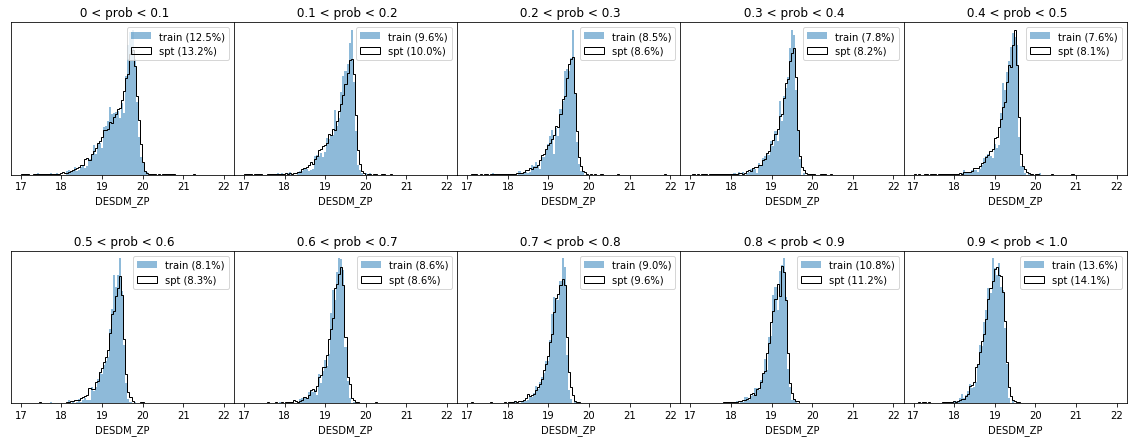

In [135]:

probcut = 0.0
cbin = np.linspace(17,22,100)
labels = ['train', 'spt']
catlist = [gold_train_prob, dmass_spt]

probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'spt' : 
            ax[i].hist( cat['MAG_MODEL_Z'][mask], \
                    bins = cbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( cat['MAG_MODEL_Z'][mask], \
                    bins = cbin, alpha = alpha, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc='best')
        ax[i].set_title(tag)
        ax[i].set_xlabel('DESDM_ZP')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


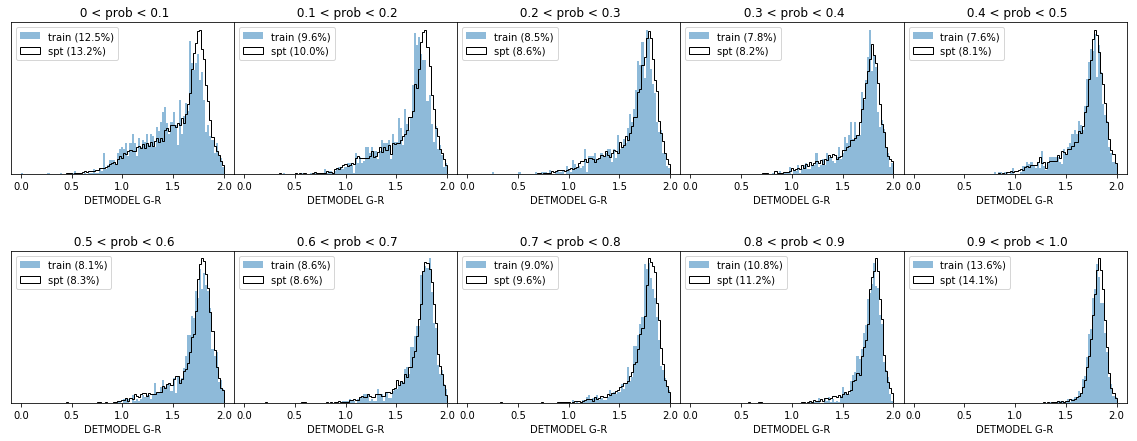

In [129]:

probcut = 0.0

labels = ['train', 'spt']
catlist = [gold_train_prob, dmass_spt]
cbin = np.linspace(0.,2., 100)
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'spt' : 
            ax[i].hist( (cat['MAG_DETMODEL_G']-cat['MAG_DETMODEL_R'])[mask], \
                    bins = cbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( (cat['MAG_DETMODEL_G']-cat['MAG_DETMODEL_R'])[mask], \
                    bins = cbin, alpha = alpha, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc=2)
        ax[i].set_title(tag)
        ax[i].set_xlabel('DETMODEL G-R')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


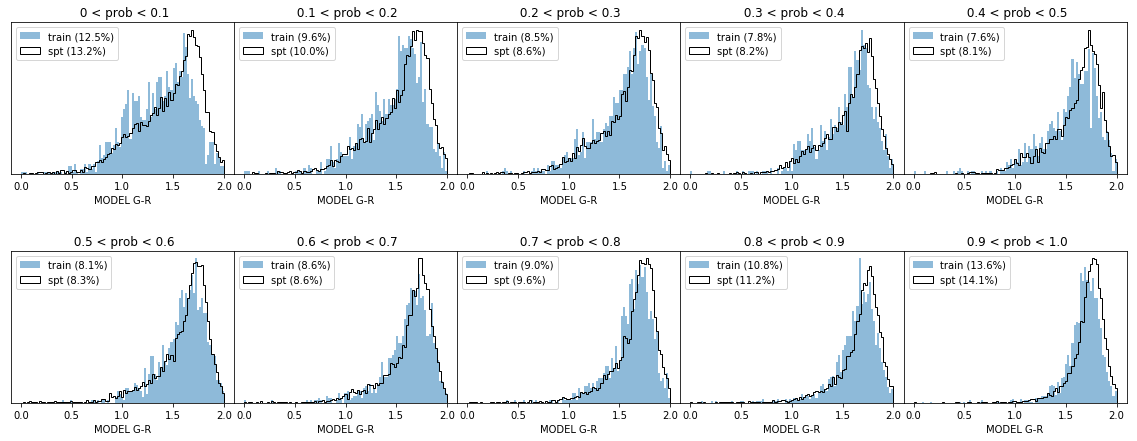

In [130]:

probcut = 0.0

labels = ['train', 'spt']
catlist = [gold_train_prob, dmass_spt]
cbin = np.linspace(0.,2., 100)
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'spt' : 
            ax[i].hist( (cat['MAG_MODEL_G']-cat['MAG_MODEL_R'])[mask], \
                    bins = cbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( (cat['MAG_MODEL_G']-cat['MAG_MODEL_R'])[mask], \
                    bins = cbin, alpha = alpha, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc=2)
        ax[i].set_title(tag)
        ax[i].set_xlabel('MODEL G-R')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


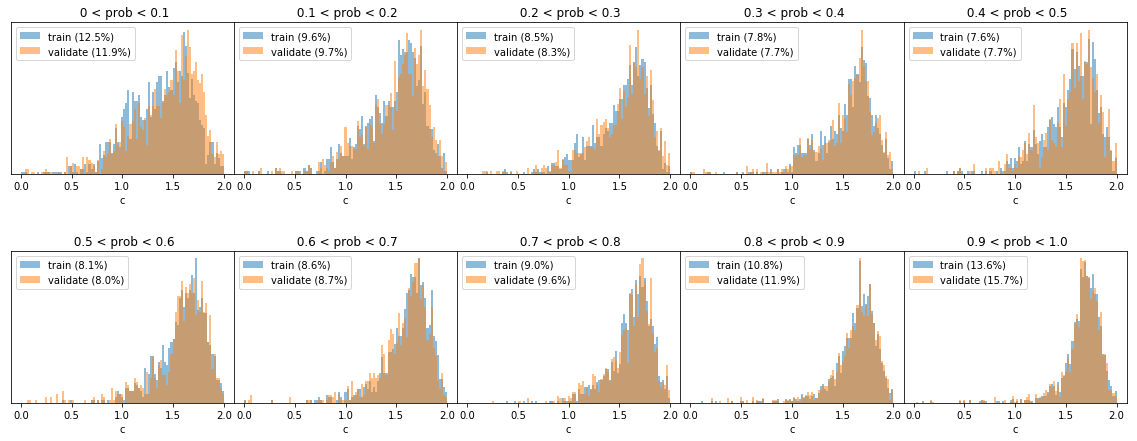

In [106]:

probcut = 0.0

labels = ['train', 'validate']
catlist = [gold_train_prob, dmass_st82]

cbin = np.linspace(0,2,100)
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01)
        ax[i].hist( (cat['MAG_MODEL_G']-cat['MAG_MODEL_R'])[mask], \
                bins = cbin, alpha = 0.5, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                   normed=True, histtype='stepfilled' );  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc=2)
        ax[i].set_title(tag)
        ax[i].set_xlabel('c')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

In [14]:
#dmass_spt = np.hstack(dmlist)
#esutil.io.write('../output/n2_2/dmass_spt.fits', dmass_spt, clobber=True)


--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk001.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk002.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk003.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk004.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk005.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk006.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk007.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk008.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk009.fits

------------------

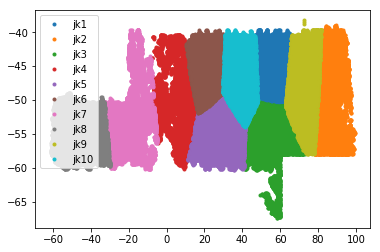

In [108]:
prob_cat_ilist = []
dmlist = []

from xd import resampleWithPth
fig, ax = plt.subplots()
for i in range(10):
    prob_cat_i = io.SearchAndCallFits(path = '/n/des/lee.5922/Dropbox/repositories/CMASS/code/output/n2_2//',\
                                    keyword='gold_spt_prob_jk{:03}'.format(i+1))
    dm, _ = resampleWithPth( prob_cat_i, pstart = 0.01, pmax = 1.0 )
    prob_cat_ilist.append(prob_cat_i)
    dmlist.append(dm)
    
    ra = dm['RA']
    ra[ra > 180] = ra[ra > 180] - 360
    
    ax.plot(ra, dm['DEC'], '.', label = 'jk{}'.format(i+1))
ax.legend()
#fig.savefig('../output/n2_2/pics/jkregion.png')

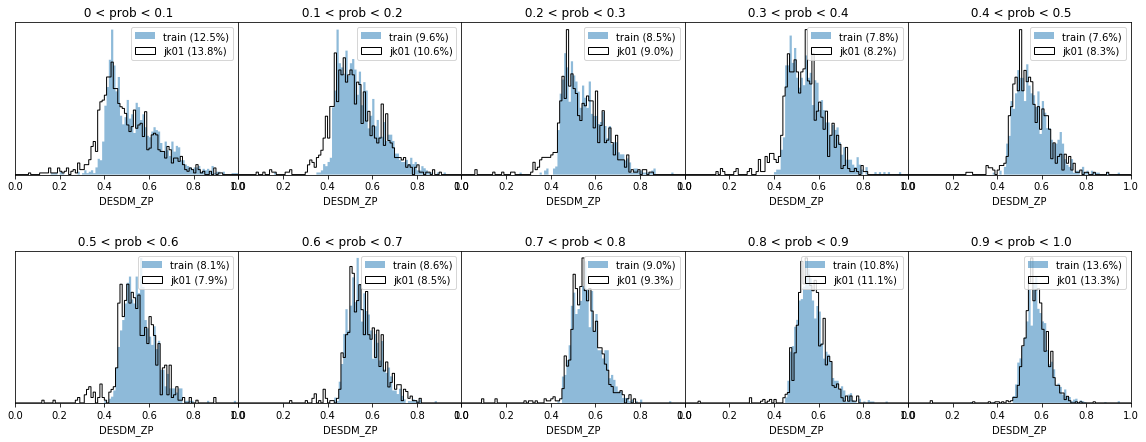

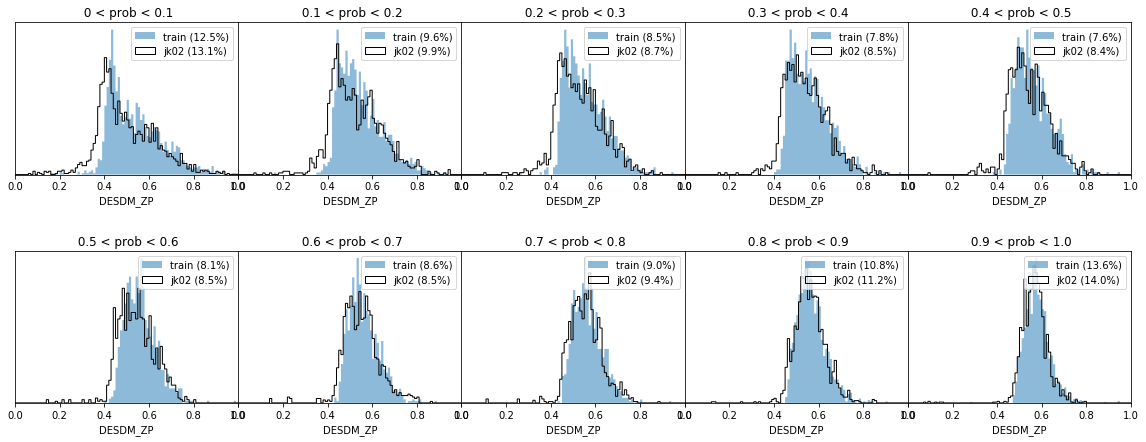

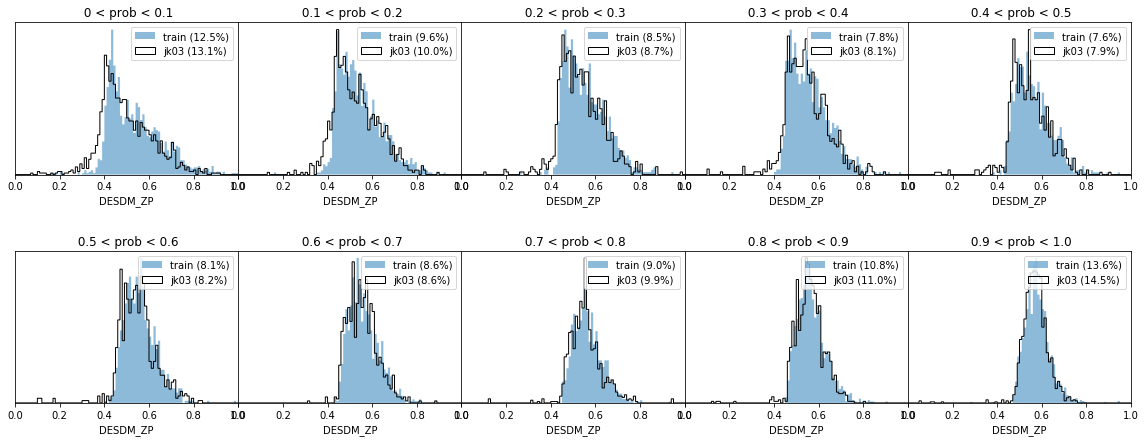

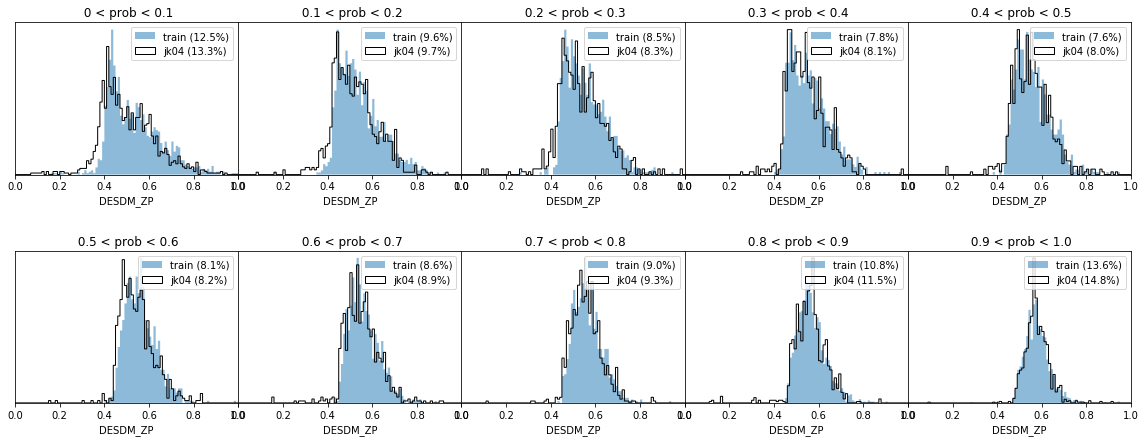

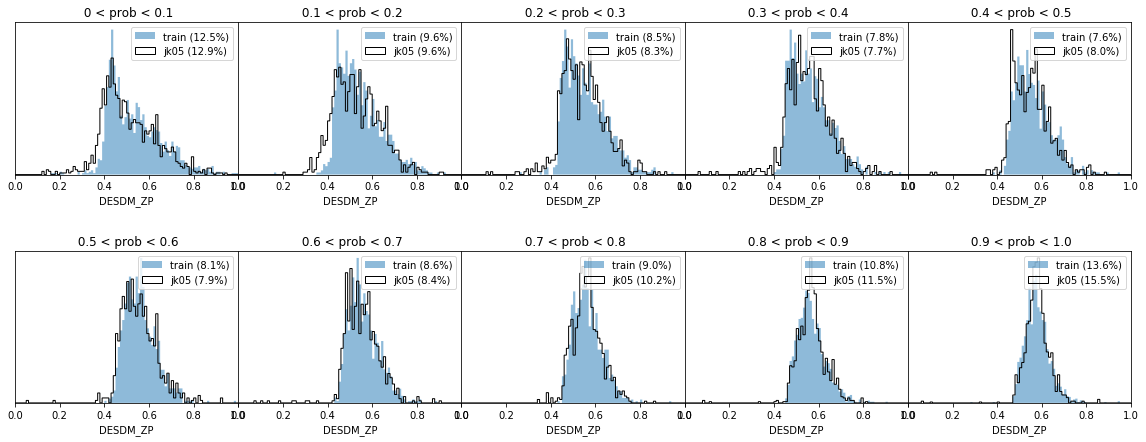

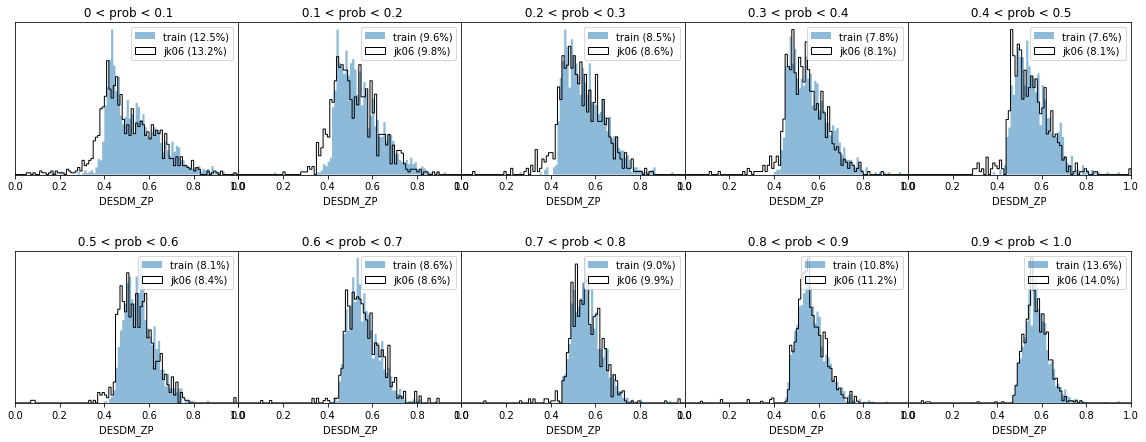

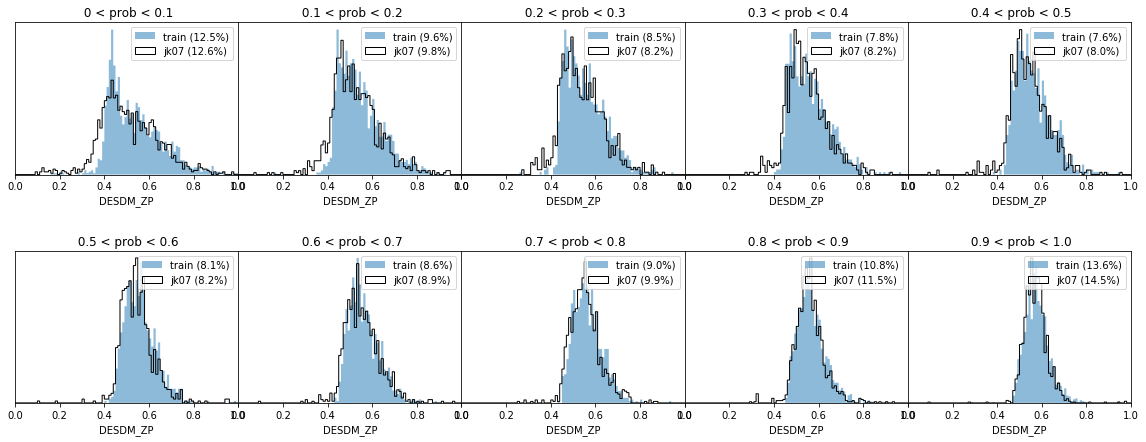

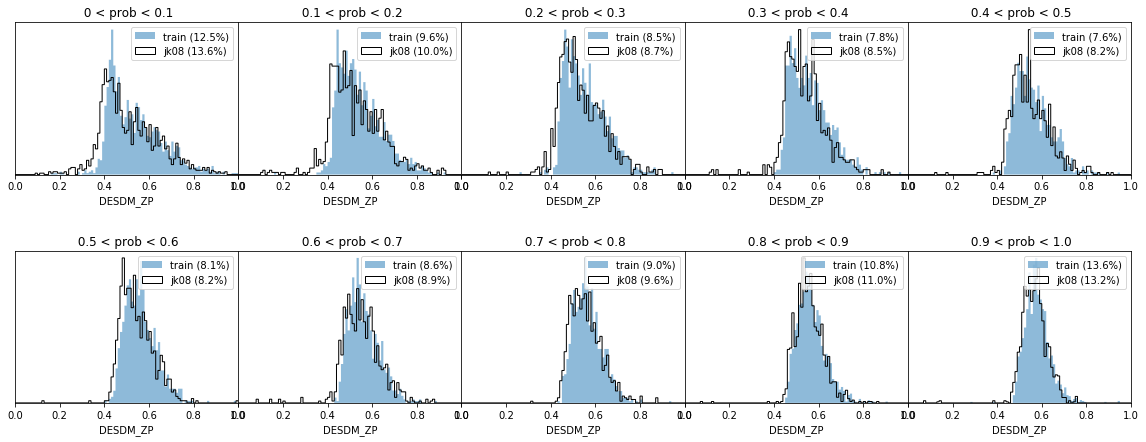

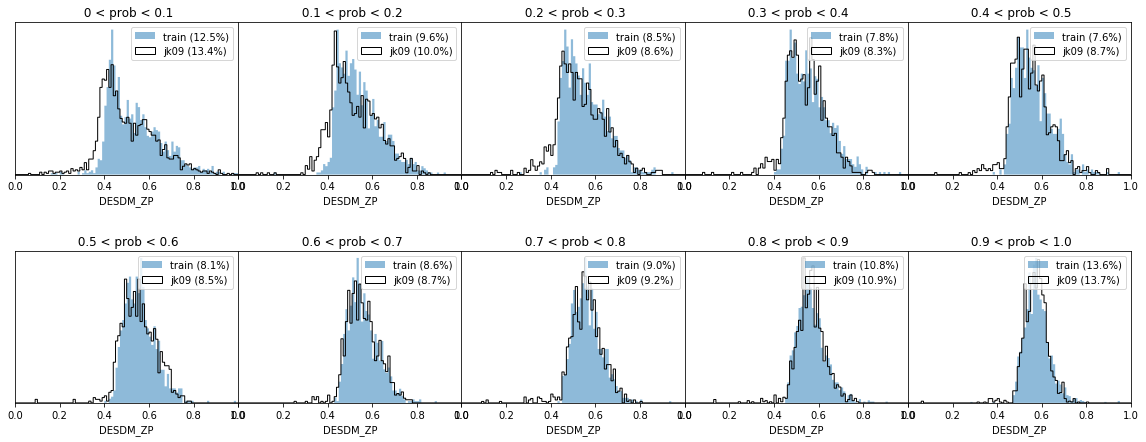

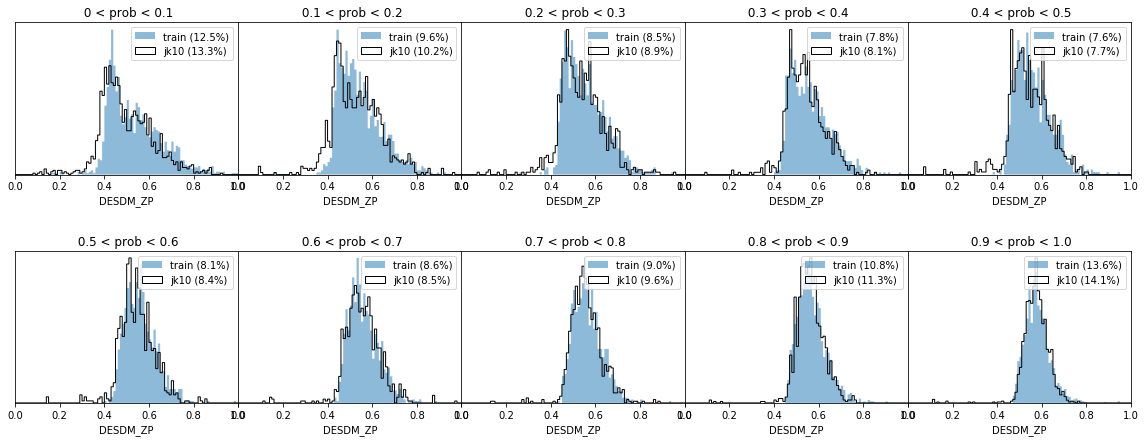

In [127]:
 
labels = ['train']+ ['jk{:02}'.format(i+1) for i in range(len(dmlist))]


for j in range(10):  
    probcut = 0
    catlist = [gold_train_prob] + dmlist[j:j+1]
    labels = ['train']+ ['jk{:02}'.format(i+1) for i in range(len(dmlist))][j:j+1]
    fig, ax = plt.subplots(2,5, figsize=(20,7))
    ax = ax.ravel()

    for i in range(10):     
        for la, cat in zip(labels, catlist) :     
            mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
            & (cat['EachProb_CMASS'] > 0.01) #& ((cat['MAG_MODEL_G']-cat['MAG_MODEL_R']) < 1.6)
            if la == 'train':
                ax[i].hist( cat['DESDM_ZP'][mask], \
                        bins = zbin, alpha = 0.5, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                           normed=True, histtype='stepfilled' );  
            else : 
                ax[i].hist( cat['DESDM_ZP'][mask], \
                        bins = zbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                           normed=True, histtype='step', color='black' );  
            #print i, probcut, probcut+0.1, np.sum(mask), la
            #print i, 
            tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
            ax[i].set_xlim(0, 1.0)
            ax[i].legend(loc='best')
            ax[i].set_title(tag)
            ax[i].set_xlabel('DESDM_ZP')
            ax[i].set_ylabel('n(z)')
            ax[i].get_yaxis().set_visible(False)
            #elif i != 2 : ax[i].get_yaxis().set_visible(False)

        probcut += 0.1

    #ax[0].get_yaxis().set_visible(True)
    #ax[5].get_yaxis().set_visible(True)
    fig.subplots_adjust(wspace=0, hspace=0.5);
    #fig.savefig('../output/n2_2/pics/probhist_jk{:03}.png'.format(j+1))

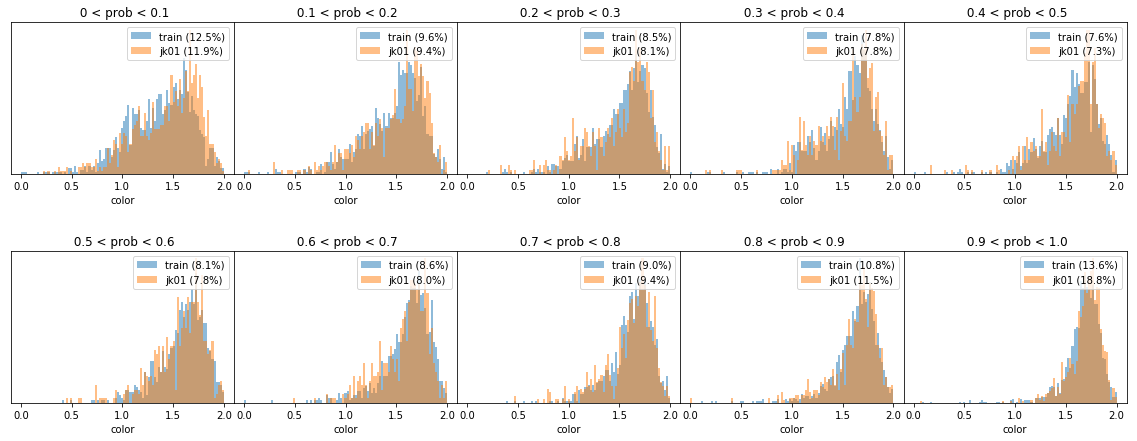

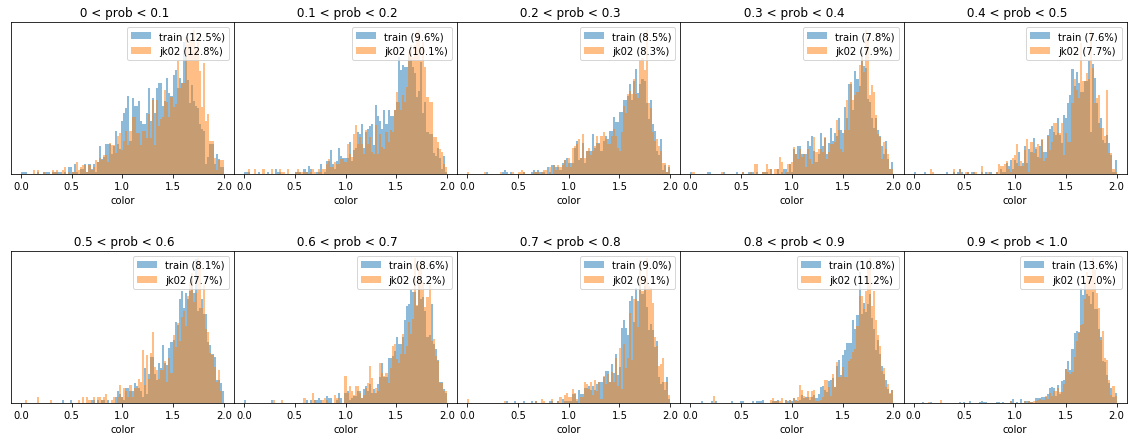

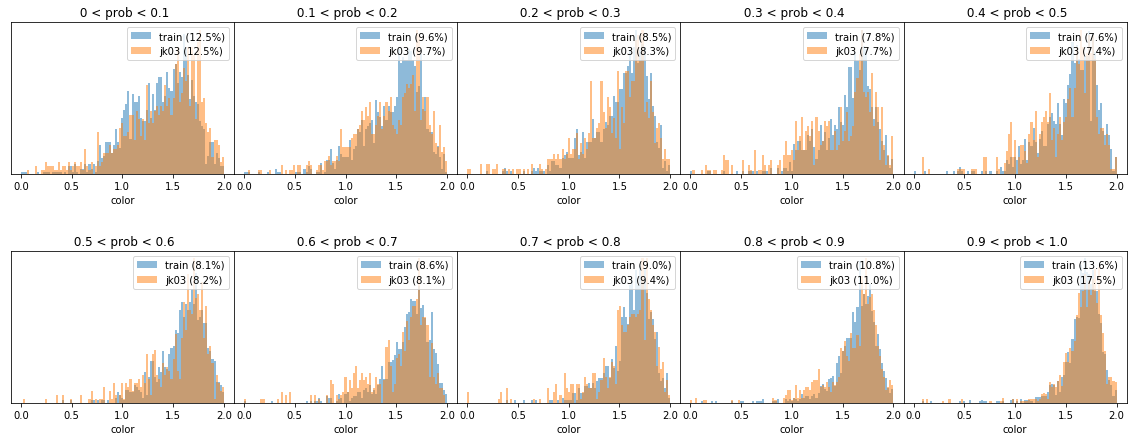

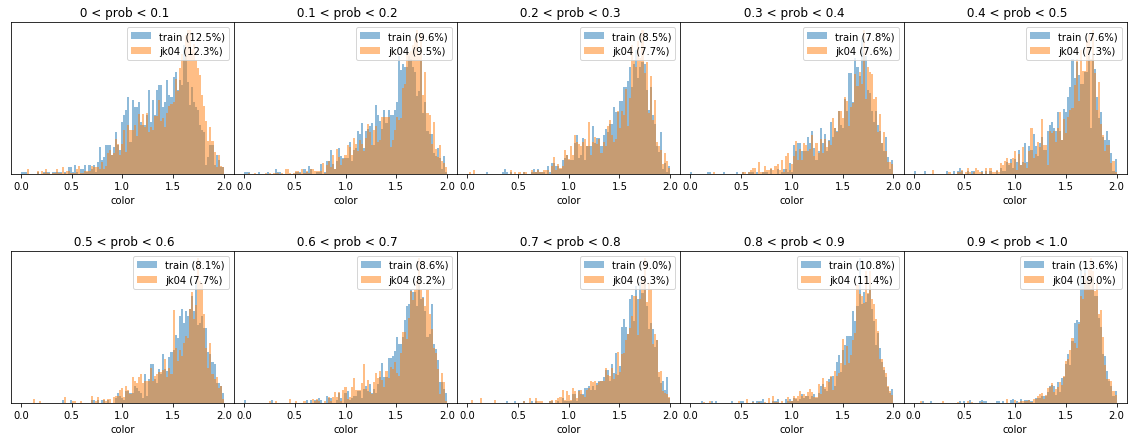

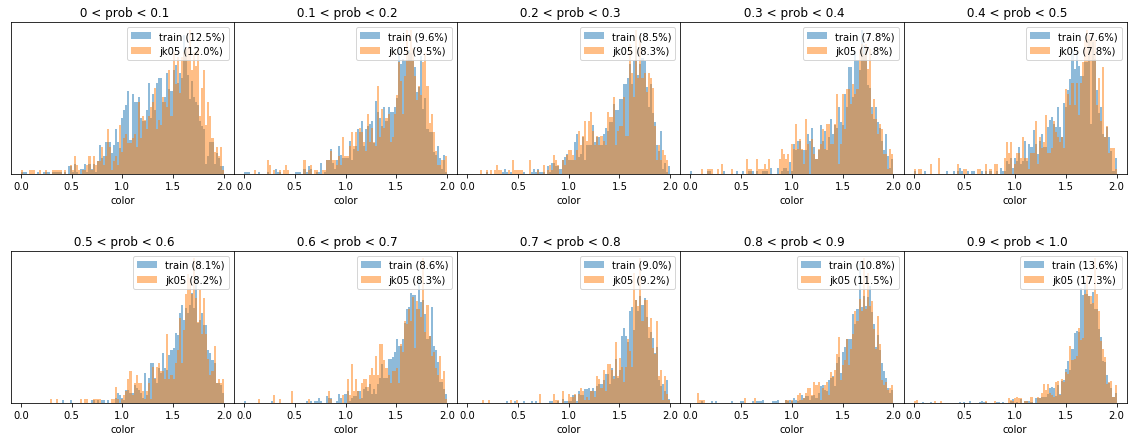

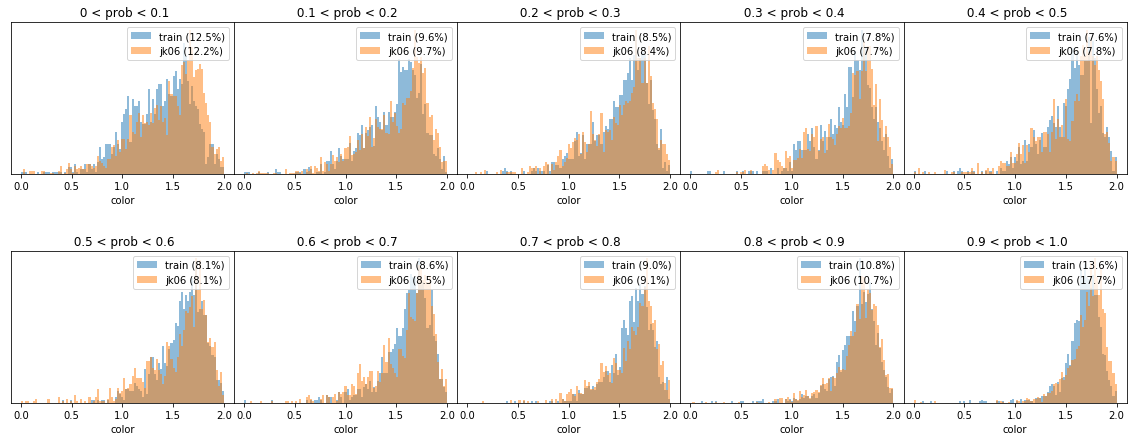

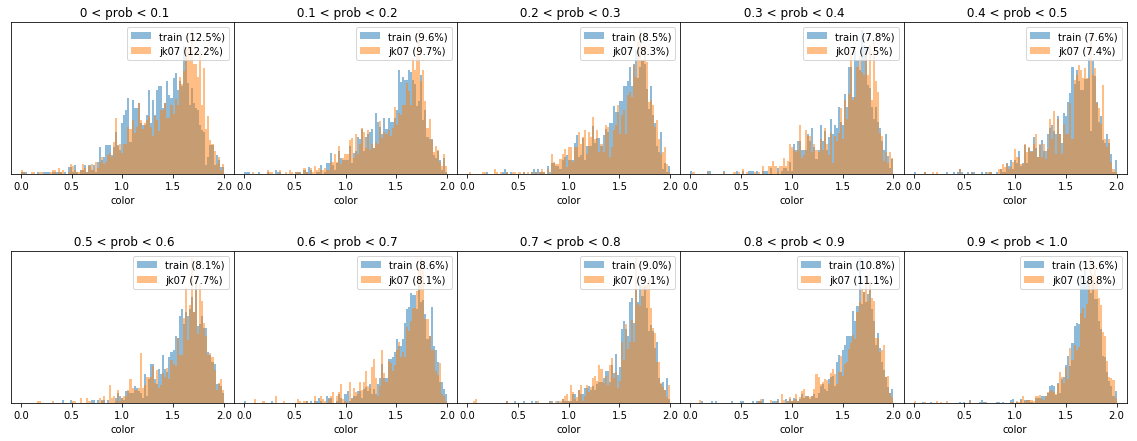

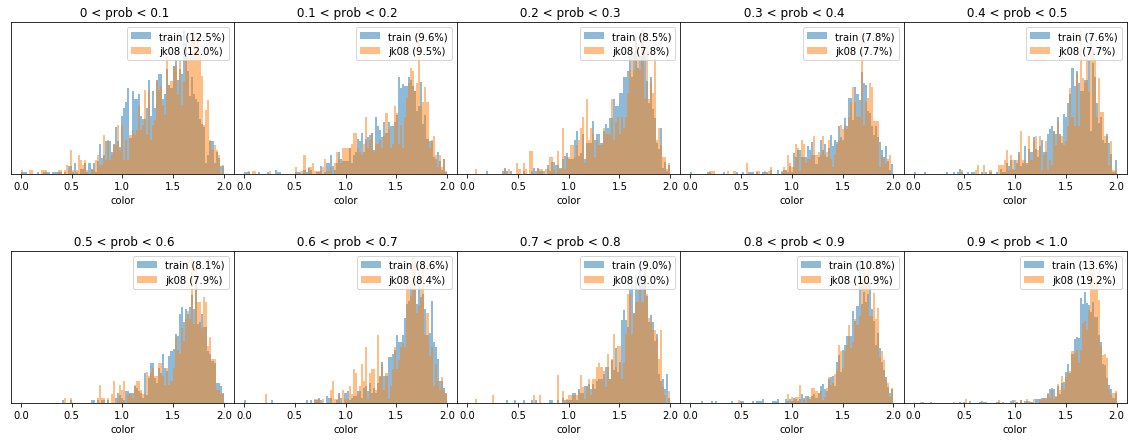

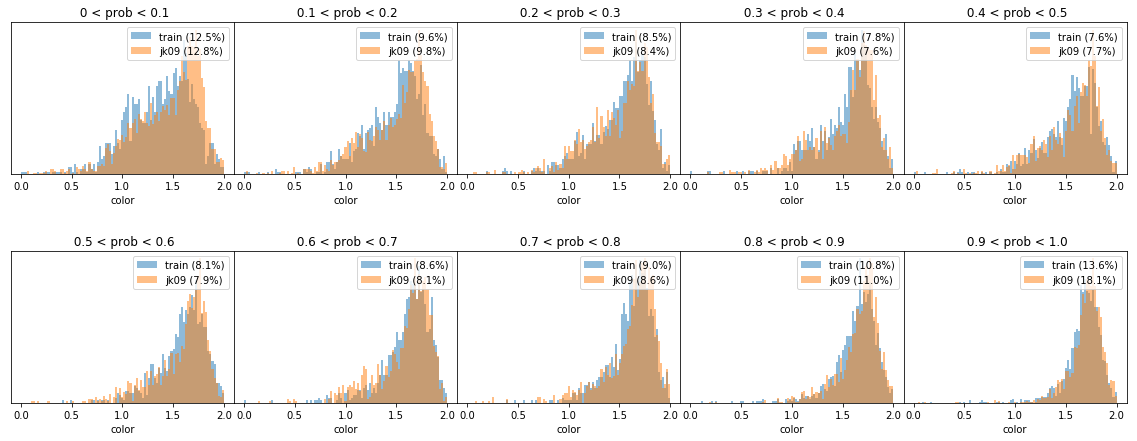

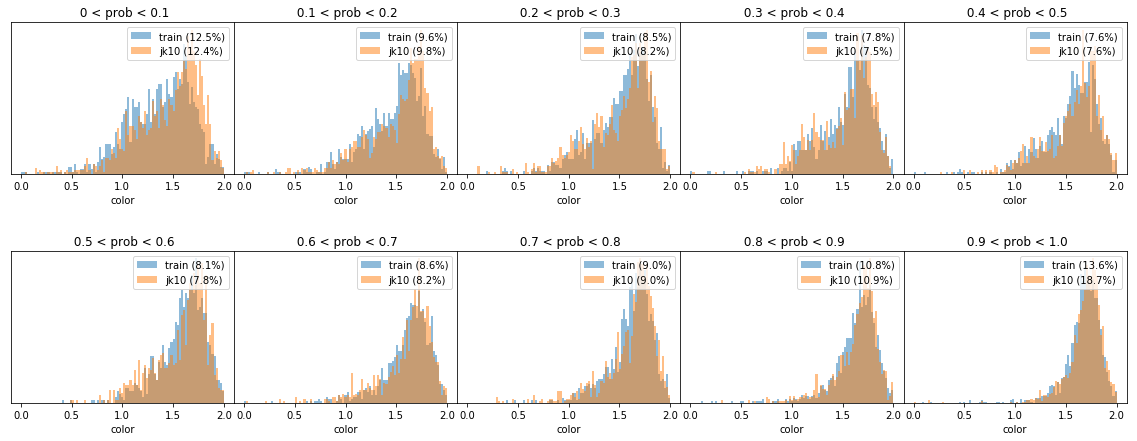

In [99]:
 
labels = ['train']+ ['jk{:02}'.format(i+1) for i in range(len(dmlist))]
cbin = np.linspace(0,2,100)

for j in range(10):  
    probcut = 0
    catlist = [gold_train_prob] + dmlist[j:j+1]
    labels = ['train']+ ['jk{:02}'.format(i+1) for i in range(len(dmlist))][j:j+1]
    fig, ax = plt.subplots(2,5, figsize=(20,7))
    ax = ax.ravel()

    for i in range(10):     
        for la, cat in zip(labels, catlist) :     
            mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
            & (cat['EachProb_CMASS'] > 0.01)
            ax[i].hist( (cat['MAG_MODEL_G']-cat['MAG_MODEL_R'])[mask], \
                    bins = cbin, alpha = 0.5, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='stepfilled' );  
            #print i, probcut, probcut+0.1, np.sum(mask), la
            #print i, 
            tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
            #ax[i].set_xlim(0, 1.0)
            ax[i].legend(loc='best')
            ax[i].set_title(tag)
            ax[i].set_xlabel('color')
            ax[i].set_ylabel('n')
            ax[i].get_yaxis().set_visible(False)
            #elif i != 2 : ax[i].get_yaxis().set_visible(False)

        probcut += 0.1

    #ax[0].get_yaxis().set_visible(True)
    #ax[5].get_yaxis().set_visible(True)
    fig.subplots_adjust(wspace=0, hspace=0.5);
    fig.savefig('../output/n6_modelgr//pics/probhist_magmodelgr_jk{:03}.png'.format(j+1))

In [55]:
import pickle
file = open('../output/n6_modelgr/gold_st82_XD_cmass.pkl', 'rb') 
clf = pickle.load(file)

In [57]:
random_sample = clf['retval'].sample(1000)

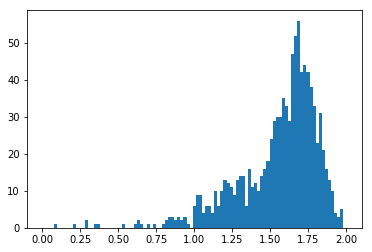

In [61]:
fig, ax = plt.subplots()
ax.hist( random_sample[:,0], bins = np.linspace(0,2,100));

In [60]:
random_sample[0,:].shape

(6,)

In [62]:
random_sample.shape

(1000, 6)

In [63]:
clf['retval'].V.shape

(10, 6, 6)